# Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

# Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df = df[['survived', 'pclass', 'age', 'fare']]

In [11]:
df.head(4)

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000


In [12]:
df.isnull().sum()

,0
survived,0
pclass,0
age,177
fare,0


In [13]:
df.fillna(df.age.median(), inplace=True)

<ipython-input-13-f0355249fdee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.age.median(), inplace=True)


In [14]:
df.isnull().sum()

,0
survived,0
pclass,0
age,0
fare,0


In [15]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [19]:
X_test_scaled=scaler.transform(X_test)

In [20]:
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

# Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


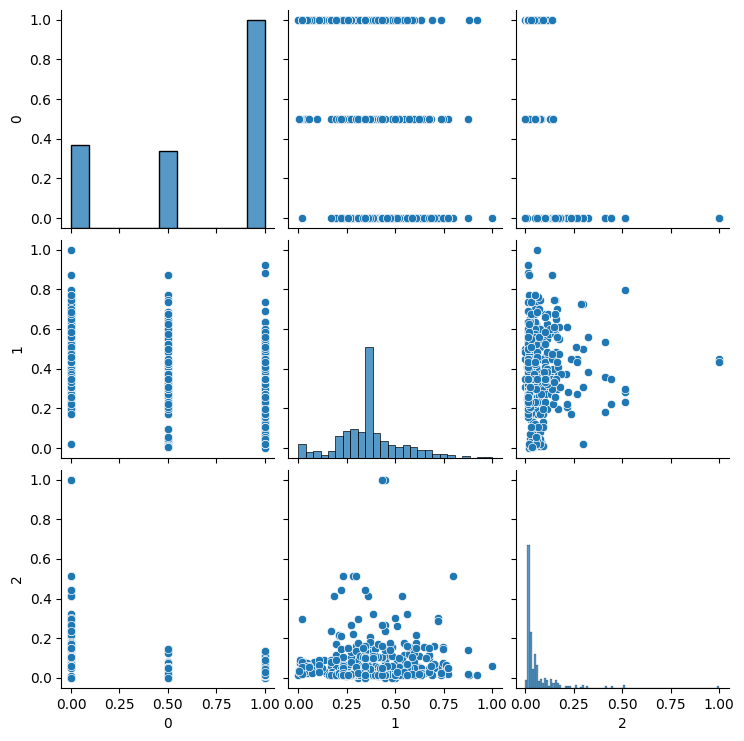

In [24]:
sns.pairplot(df_minmax)

#Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [28]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

#Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more general, you can use any exponent)
5. boxcox transformation

In [29]:
df = df[['survived', 'pclass', 'age', 'fare']]

In [31]:
df.isnull().sum()

,0
survived,0
pclass,0
age,0
fare,0


In [33]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt

In [34]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

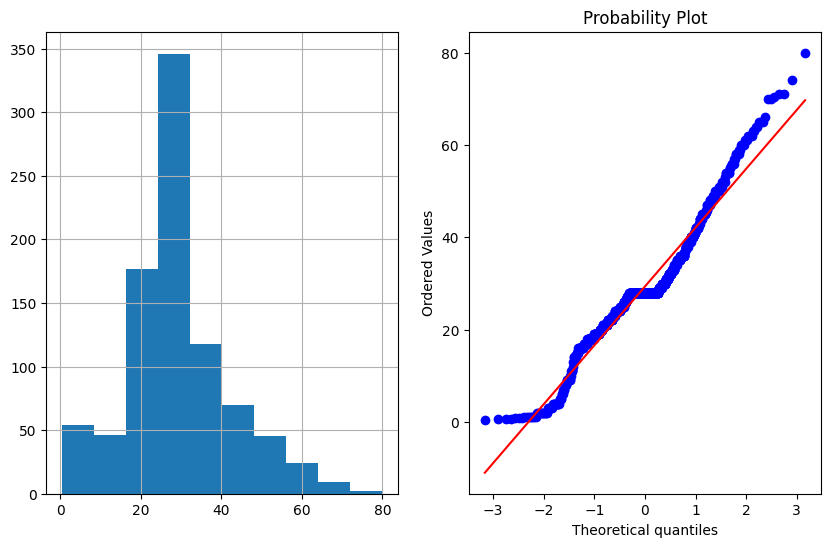

In [36]:
plot_data(df,'age')

Logarithmic Transformation

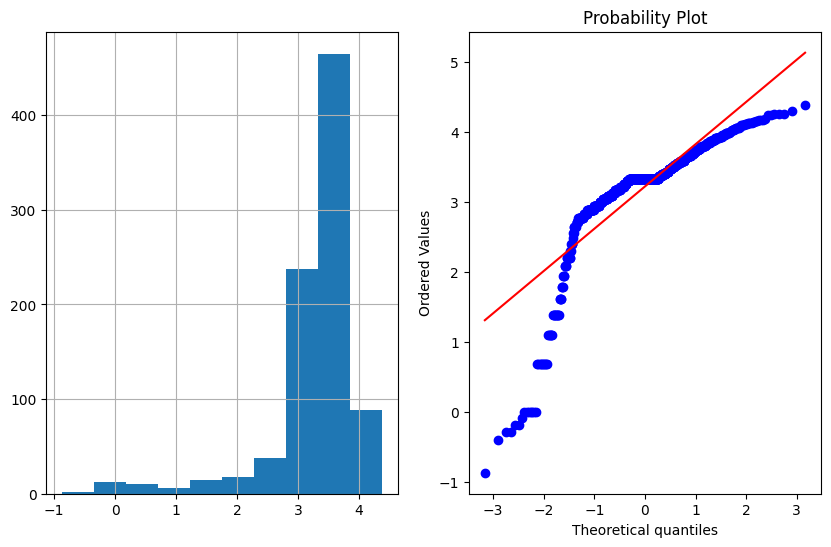

In [38]:
import numpy as np
df['age_log']=np.log(df['age'])
plot_data(df,'age_log')

Reciprocal Transformation

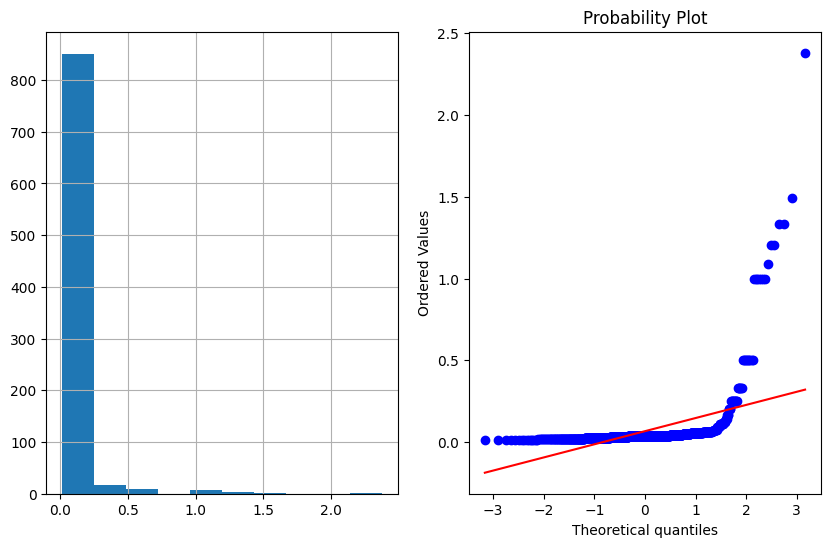

In [40]:
df['Age_reciprocal']=1/df.age
plot_data(df,'Age_reciprocal')

Square Root Transformation

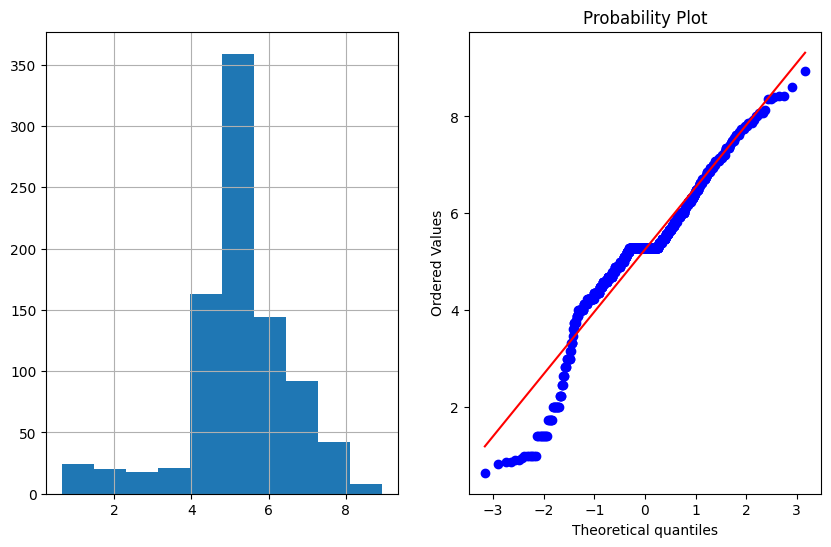

In [41]:
##### Square Root Transformation
df['Age_sqaure']=df.age**(1/2)
plot_data(df,'Age_sqaure')

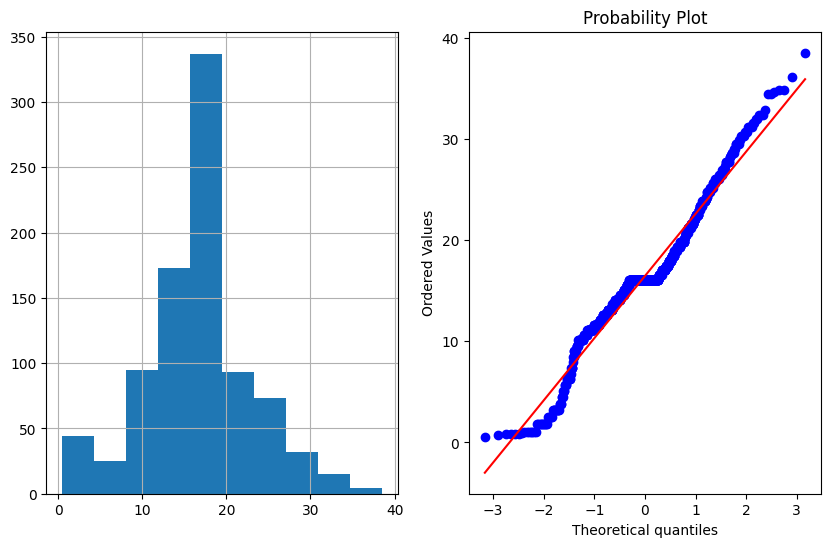

In [43]:
#### Exponential Transdormation
df['Age_exponential']=df.age**(1/1.2)
plot_data(df,'Age_exponential')

#BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [45]:
df['Age_Boxcox'],parameters=stat.boxcox(df['age'])

In [46]:
print(parameters)

0.796453129010849


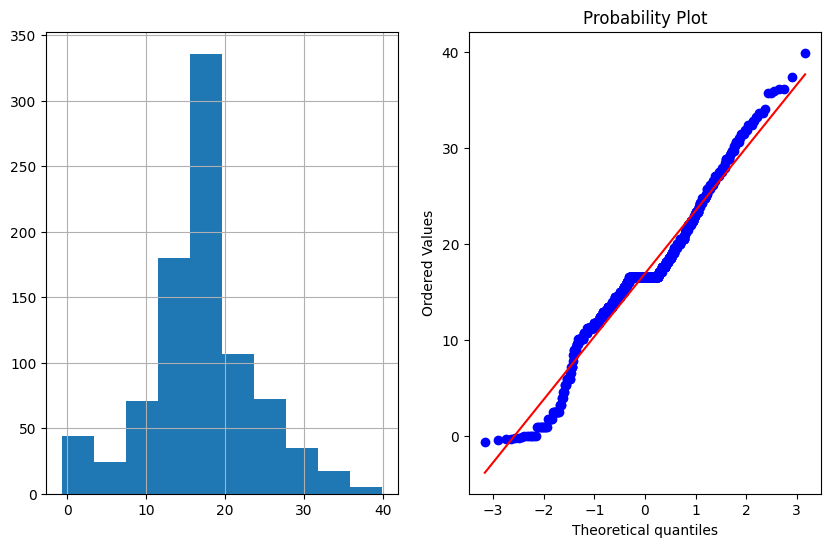

In [47]:
plot_data(df,'Age_Boxcox')

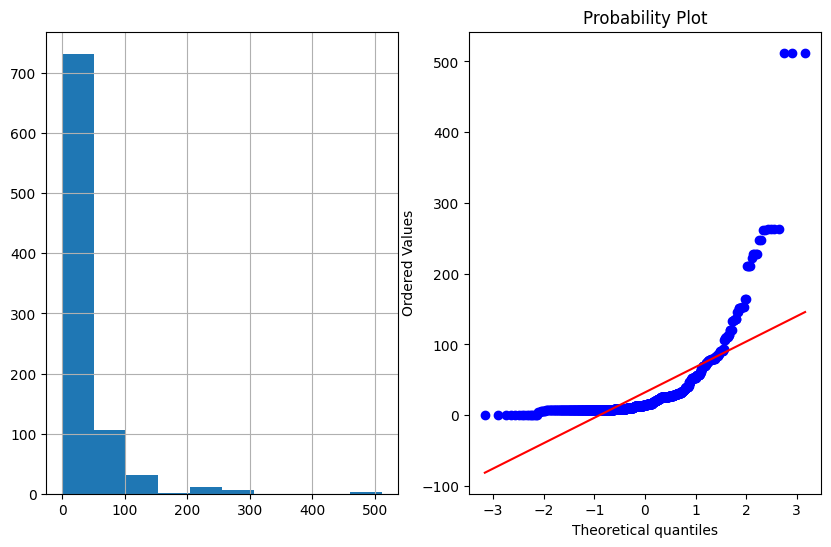

In [50]:
plot_data(df,'fare')

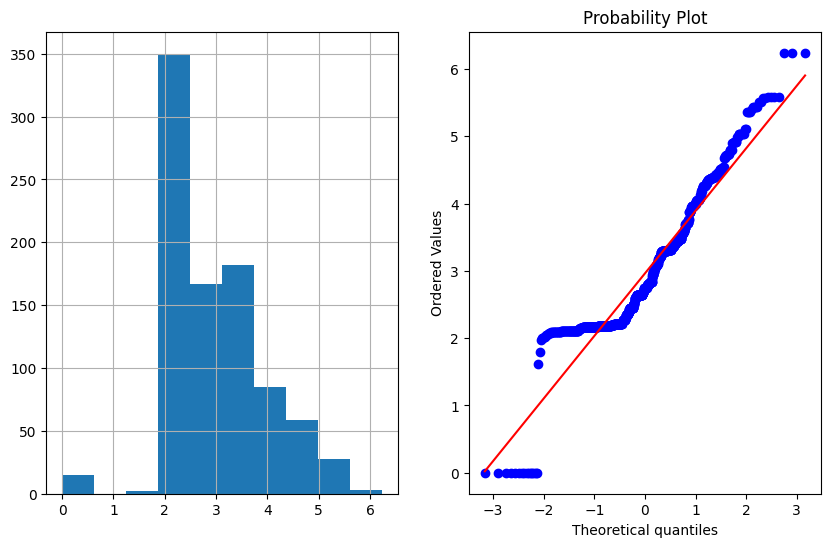

In [51]:
#### Fare
df['Fare_log']=np.log1p(df['fare'])
plot_data(df,'Fare_log')

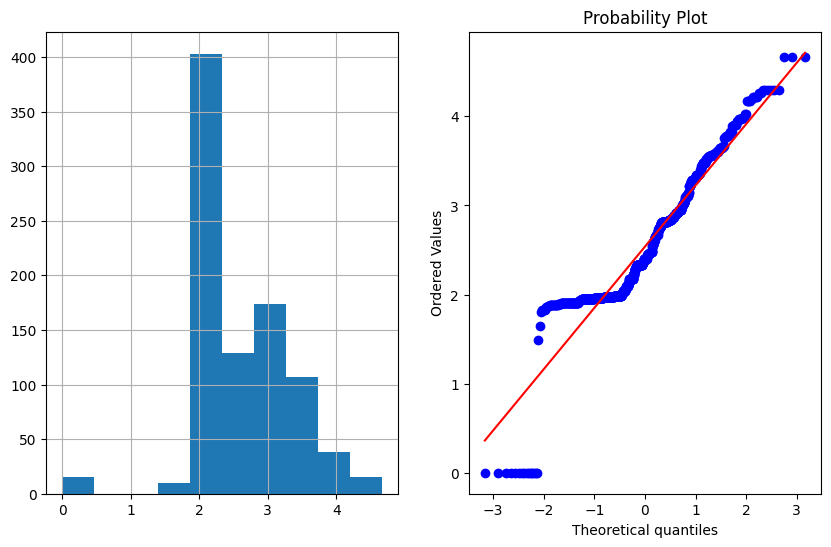

In [53]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['fare']+1)
plot_data(df,'Fare_Boxcox')

# One hot encoding




In [41]:
df = pd.read_csv('train.csv', usecols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

In [42]:
df.head(5)

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [43]:
for col in df.columns:
  print(col, ':', len(df[col].unique()))

X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


If we do one hot encoding then it will create 123 columns for only 6 features.

In [44]:
pd.get_dummies(df).shape

(4209, 123)

Instead we will take top 10 frequent occuring features from every 6 columns and do one hot encoding

In [45]:
top10 = [x for x in df.X1.value_counts().sort_values(ascending=False).head(10).index]

In [46]:
top10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [47]:
for lable in top10:
  df[lable] = np.where(df['X1'] == lable, 1, 0)

df[['X1']+top10]

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,s,0,1,0,0,0,0,0,0,0,0
4205,o,0,0,0,0,0,0,0,0,0,1
4206,v,0,0,0,0,1,0,0,0,0,0
4207,r,0,0,0,0,0,1,0,0,0,0


In [48]:
def one_hot_encod(df, col, top_x):
  for c in top_x:
    df[col+'_'+c] = np.where(df[col] == c, 1, 0)


Only for X1 feature, we can repeat it for X2, X3, X4, X5, X6

In [49]:
one_hot_encod(df, 'X1', top10)

In [50]:
df

,X1,X2,X3,X4,X5,X6,aa,s,b,l,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,s,as,c,d,aa,d,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,o,t,d,d,aa,h,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4206,v,r,a,d,aa,g,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4207,r,e,f,d,aa,l,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# count or frequency method
It is used to do encoding if we have high cardinality after one hot encoding.

Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality.

If we have categorical variables containing many multiple labels or high cardinality,then by using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

Let's see how this works:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2'])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [2]:
df.shape

(4209, 2)

In [3]:
pd.get_dummies(df).shape

(4209, 71)

In [4]:
len(df['X1'].unique())

27

In [5]:
len(df['X2'].unique())

44

In [6]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'an': 5,
 'q': 5,
 'av': 4,
 'ah': 4,
 'p': 4,
 'au': 3,
 'am': 1,
 'j': 1,
 'af': 1,
 'l': 1,
 'aa': 1,
 'c': 1,
 'o': 1,
 'ar': 1}

In [7]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
df_frequency_map = df.X2.value_counts().to_dict()

In [8]:
# and now we replace X2 labels in the dataset df
df.X2 = df.X2.map(df_frequency_map)

df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


There are some advantages and disadvantages that we will discuss now

#Advantages
1. It is very simple to implement
2. Does not increase the feature dimensional space
#Disadvantages
1. If some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.
2. Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power